Temizlenmiş veri şekli: (4699, 6)
         AI Impact        Tasks    AI models  AI_Workload_Ratio
count  4699.000000  4699.000000  4699.000000        4699.000000
mean     30.327942   401.301341  1820.385827           0.204619
std      18.212978   311.416995  1085.393648           0.076547
min       5.000000     1.000000     1.000000           0.036585
25%      15.000000   162.000000  1087.000000           0.137262
50%      25.000000   271.000000  1578.000000           0.198885
75%      40.000000   609.000000  2277.500000           0.260450
max      98.000000  1387.000000  5666.000000           1.000000

X kolonları: ['Tasks', 'AI models', 'AI_Workload_Ratio', 'Domain']
y örnek: 0    98
1    95
2    95
3    95
4    92
Name: AI Impact, dtype: int64

--- MODEL SONUÇLARI ---
MAE  : 9.987
RMSE : 14.162
R^2  : 0.439


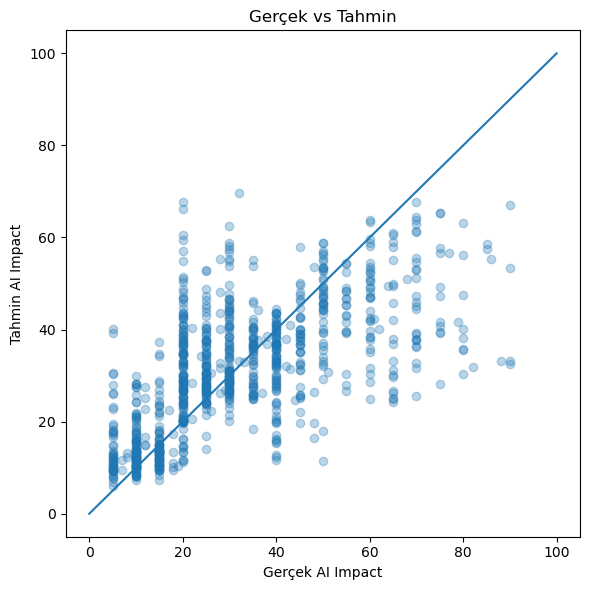

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt


df = pd.read_csv("My_Data.csv")


df["AI Impact"] = df["AI Impact"].str.replace("%", "", regex=False)
df["AI Impact"] = pd.to_numeric(df["AI Impact"], errors="coerce")


numeric_cols_all = ["AI Impact", "Tasks", "AI models", "AI_Workload_Ratio"]


df[numeric_cols_all] = df[numeric_cols_all].replace([np.inf, -np.inf], np.nan)


df["AI_Workload_Ratio"] = df["AI_Workload_Ratio"].clip(lower=0, upper=1)


df = df.dropna(subset=numeric_cols_all)

print("Temizlenmiş veri şekli:", df.shape)
print(df[numeric_cols_all].describe())


y = df["AI Impact"]

X = df[["Tasks", "AI models", "AI_Workload_Ratio", "Domain"]].copy()

print("\nX kolonları:", X.columns.tolist())
print("y örnek:", y.head())


numeric_features = ["Tasks", "AI models", "AI_Workload_Ratio"]
categorical_features = ["Domain"]


numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- MODEL SONUÇLARI ---")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R^2  : {r2:.3f}")


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0,100], [0,100])
plt.xlabel("Gerçek AI Impact")
plt.ylabel("Tahmin AI Impact")
plt.title("Gerçek vs Tahmin")
plt.tight_layout()
plt.show()
